##IT464 - FML
#Name:Rajmani Pandey
#Roll No.: 221IT053
#Lab Assignment 1
contains all 6 questions




Q1) Find the line of best fit (linear regression) for the following data set and plot it.
https://www.kaggle.com/datasets/tanuprabhu/linear-regression-dataset
Find the predictions to x=[20,40,60,...,280,300] and Compute the least squared error
(LSE). Print/tabulate ” x, predictions and LSE”.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Linear Regression - Sheet1.csv to Linear Regression - Sheet1.csv


In [4]:
df = pd.read_csv('Linear Regression - Sheet1.csv')

In [5]:
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


In [54]:
X = df.iloc[:, 0].values.reshape(-1, 1)  # Reshape for sklearn
Y = df.iloc[:, 1].values.reshape(-1, 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred_test = model.predict(X_test)

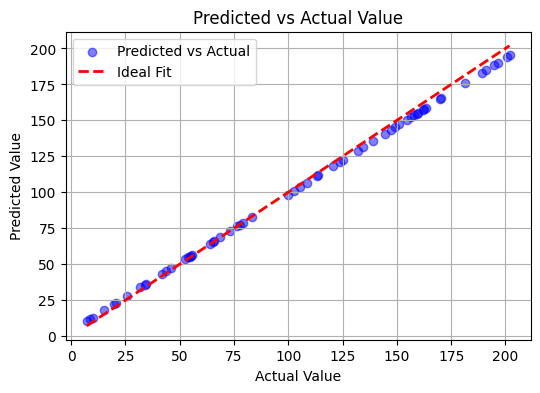

In [57]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs Actual Value")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
x_test = np.arange(20, 301, 20).reshape(-1, 1)
y_pred_custom = model.predict(x_test)

In [59]:
df_results = pd.DataFrame({"X": x_test.flatten(), "Predicted Y": y_pred_custom.flatten()})
print("\nPredictions for given X values:")
print(df_results.to_string(index=False))


Predictions for given X values:
  X  Predicted Y
 20    19.248296
 40    31.911152
 60    44.574008
 80    57.236864
100    69.899720
120    82.562576
140    95.225432
160   107.888288
180   120.551144
200   133.214000
220   145.876856
240   158.539712
260   171.202568
280   183.865424
300   196.528280


In [60]:
lse = np.sum((y_test - y_pred_test) ** 2)
mse = mean_squared_error(y_test, y_pred_test)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Least Squared Error (LSE): {lse:.4f}")


Mean Squared Error (MSE): 11.5543
Least Squared Error (LSE): 693.2583


Q2) Find the line of best fit (multiple linear regression - MLR) for the California Housing
Dataset and plot it.
https://www.geeksforgeeks.org/dataset-for-linear-regression/
Note: Exclude “longitude, latitude and ocean proximity” parameters/variables.
Compute the price for the “housing2” test data using the MLR prediction.

In [ ]:
df = pd.read_csv('california_housing-dataset.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.drop(columns=['longitude', 'latitude', 'ocean_proximity'], inplace=True)

In [ ]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [ ]:
# Split data into features and target variable
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse : {mse}")
print(f"r2 score : {r2}")

mse : 5968852333.910648
r2 score : 0.5445046216087996


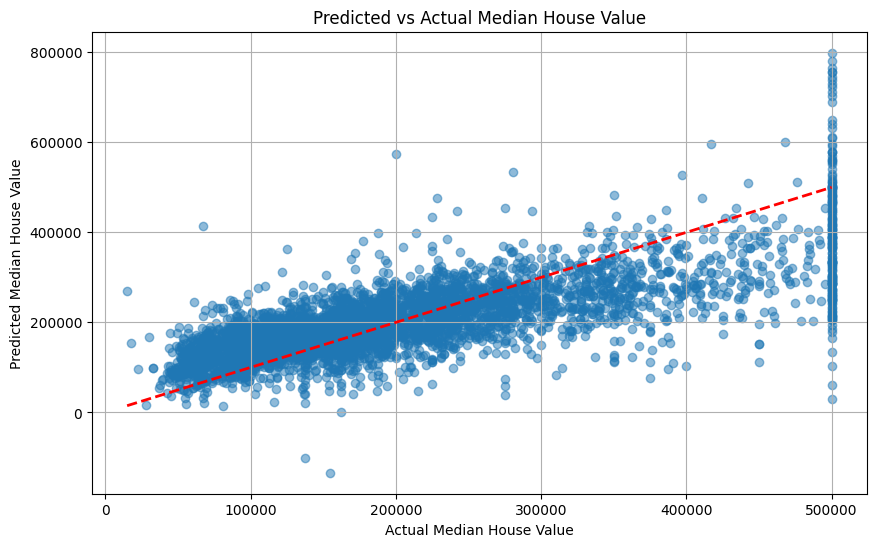

In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Predicted vs Actual Median House Value")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.grid(True)
plt.show()

Q3) Perform MLR and Logistic regression on the following data to predict heart disease.
https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regres
sion
Predict heart disease for the “heart2” test data.

In [50]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from imblearn.over_sampling import SMOTE

In [2]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [51]:
df = pd.read_csv('framingham.csv')

In [52]:
print("=== Dataset Overview ===")
df.head()

=== Dataset Overview ===


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [53]:
orignal_size = df.size
(df.isnull().sum())/orignal_size*100

,0
male,0.000000
age,0.000000
education,0.154849
currentSmoker,0.000000
cigsPerDay,0.042768
BPMeds,0.078162
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,0.073738


In [12]:
print("\n=== Dataset Information ===")
df.info()


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory 

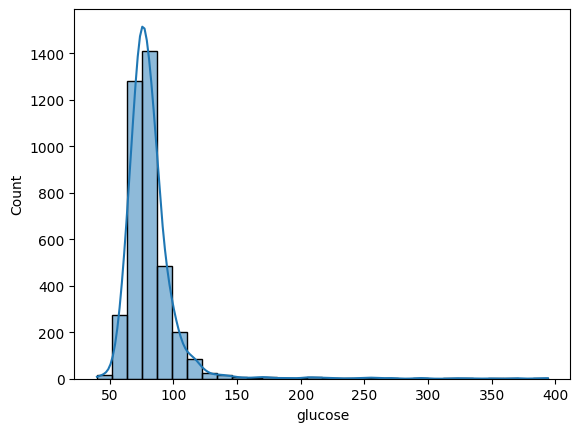

In [54]:
sns.histplot(df['glucose'],bins= 30,kde = True)
plt.show()

<ipython-input-55-2d54099f9b30>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['glucose'].fillna(df['glucose'].mean(),inplace= True)


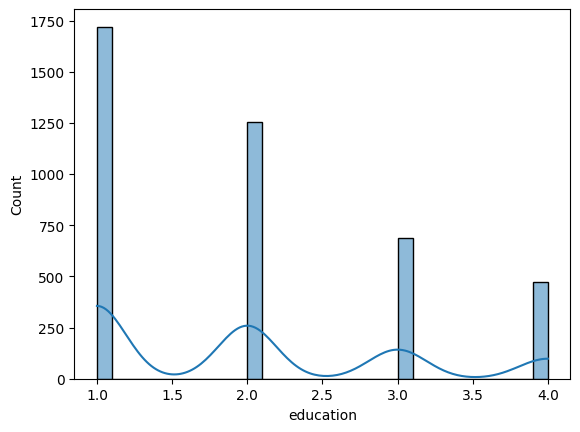

In [55]:
df['glucose'].fillna(df['glucose'].mean(),inplace= True)
sns.histplot(df['education'],bins= 30,kde = True)
plt.show()

In [56]:
df['education'].fillna(df['education'].mode()[0],inplace= True)
df.dropna(inplace = True)
df['TenYearCHD'].value_counts()

<ipython-input-56-98eae86e204d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0],inplace= True)


,count
TenYearCHD,
0,3477
1,611


In [57]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [58]:
X = df.drop(columns = ['TenYearCHD'])
y = df['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
smote_enn = SMOTEENN(smote=SMOTE(sampling_strategy=0.6), random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print("After SMOTEENN:")
print(pd.Series(y_resampled).value_counts())

After SMOTEENN:
TenYearCHD
0    1679
1    1251
Name: count, dtype: int64


In [60]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print("Accuracy_score:",accuracy)
print("F1 score : ",f1_score)

Accuracy_score: 0.6601466992665037
F1 score :  0.31862745098039214


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       697
           1       0.23      0.54      0.32       121

    accuracy                           0.66       818
   macro avg       0.56      0.61      0.55       818
weighted avg       0.80      0.66      0.71       818



In [3]:
from google.colab import files
uploaded = files.upload()

Saving heart2.csv to heart2.csv


In [64]:
df_pred = pd.read_csv('heart2.csv')
df_pred.shape

(13, 16)

In [65]:
df_pred.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,51,3,1,16,1,0,0,0,237,253,105,34,75,203
4,NaN,1,39,3,0,7,0,0,1,0,279,110,106,31,71,314


In [66]:
df_pred.columns = df_pred.iloc[1].values
df_pred = df_pred.iloc[3:]
df_pred.drop(df_pred.columns[0],axis = 1,inplace=True)

<ipython-input-66-74e4add26b32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred.drop(df_pred.columns[0],axis = 1,inplace=True)


In [67]:
df_pred.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [68]:
pd.DataFrame(model.predict(df_pred))

,0
0,1
1,0
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [69]:
df_pred

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3,0,51,3,1,16,1,0,0,0,237,253,105,34,75,203
4,1,39,3,0,7,0,0,1,0,279,110,106,31,71,314
5,1,45,4,1,19,0,1,0,1,290,180,87,47,70,152
6,1,33,2,0,28,1,0,0,0,229,243,116,42,93,199
7,0,31,2,0,13,1,0,0,0,181,191,110,35,66,145
8,1,58,3,0,19,0,1,0,0,244,200,61,32,73,150
9,0,47,2,0,19,1,1,1,0,184,236,88,42,106,230
10,0,39,1,0,5,1,0,0,0,293,240,119,26,95,102
11,1,55,1,1,30,0,0,0,0,233,260,118,44,108,243
12,1,34,4,1,7,0,0,0,0,216,157,119,41,126,99


Q4) Compute PCA components for the heart disease data. Predict heart disease with the
PCA features (consider #PCA features = [1,2,3,4,5]) and evaluate the performance in
terms of confusion matrix. Note down your observations.

In [70]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
# Apply PCA for different numbers of components
pca_components = [1, 2, 3, 4, 5,6 ,7]

for n in pca_components:
    print(f"\nEvaluating PCA with {n} components...")

    # Perform PCA
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Logistic Regression
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print("F1 score : ",f1)
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.4f}")


Evaluating PCA with 1 components...
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       691
           1       0.50      0.02      0.03       127

    accuracy                           0.84       818
   macro avg       0.67      0.51      0.47       818
weighted avg       0.79      0.84      0.78       818

F1 score :  0.030534351145038167
Confusion Matrix:
[[689   2]
 [125   2]]
Accuracy: 0.8447

Evaluating PCA with 2 components...
              precision    recall  f1-score   support

           0       0.85      1.00      0.91       691
           1       0.40      0.02      0.03       127

    accuracy                           0.84       818
   macro avg       0.62      0.51      0.47       818
weighted avg       0.78      0.84      0.78       818

F1 score :  0.030303030303030304
Confusion Matrix:
[[688   3]
 [125   2]]
Accuracy: 0.8435

Evaluating PCA with 3 components...
              precision    recall  f1-score   support

# **Observations:**

* PCA with 1 Component:
High accuracy (84.47%), but very poor recall for class 1 (only 2%).
The model heavily favors class 0, leading to a very low F1-score of 0.03 for class 1.
The confusion matrix shows that only 2 cases of heart disease were correctly classified.

* PCA with 2 Components:
Accuracy slightly drops (84.35%).
Similar poor recall for class 1 (2%), meaning the model still struggles to detect heart disease.
F1-score remains very low (0.03), showing minimal improvement.

* PCA with 3 Components:
Accuracy remains 84.35%.
A small increase in class 1 recall (3%), leading to a slight increase in F1-score to 0.058.
The confusion matrix indicates the model still misclassifies most heart disease cases.

* PCA with 4 Components:
Accuracy improves slightly (84.72%).
Recall for class 1 increases to 6%, leading to a noticeable increase in F1-score (0.10).
This suggests the model starts to capture more meaningful patterns.

* PCA with 5 Components:
Accuracy drops slightly (84.11%).
Recall for class 1 decreases back to 2%, and the F1-score drops to 0.029.
The model’s ability to detect heart disease worsens.

* PCA with 6 Components:
Accuracy remains 84.23%.
Recall for class 1 increases to 5%, leading to a small F1-score improvement (0.085).
The model performs slightly better than with 5 components.

* PCA with 7 Components:
Accuracy remains 84.35%.
Recall for class 1 increases to 6%, leading to the highest F1-score (0.111).
This suggests that increasing PCA components can help capture more relevant information.

**Key Takeaways:**


1.   Higher PCA components slightly improve class 1 detection, but overall recall remains poor.
2.   PCA with 4 components provides the best balance between accuracy (84.72%) and class 1 recall.
3. Too few PCA components (1-2) cause significant loss of information, leading to poor heart disease detection.
4. Too many PCA components (5-7) do not significantly improve performance and may introduce noise.

Q5) Load Cameraman image from python libraries and reduce the dimensionality using
SVD, Check its visual appearances (original versus new image) for the different
numbers of SVD components. Additionally, find the correlation between the original and
reconstructed images from the different numbers of SVD components (say 1,2,...,9,10).

In [ ]:
from skimage.data import camera
from scipy.linalg import svd
from scipy.stats import pearsonr

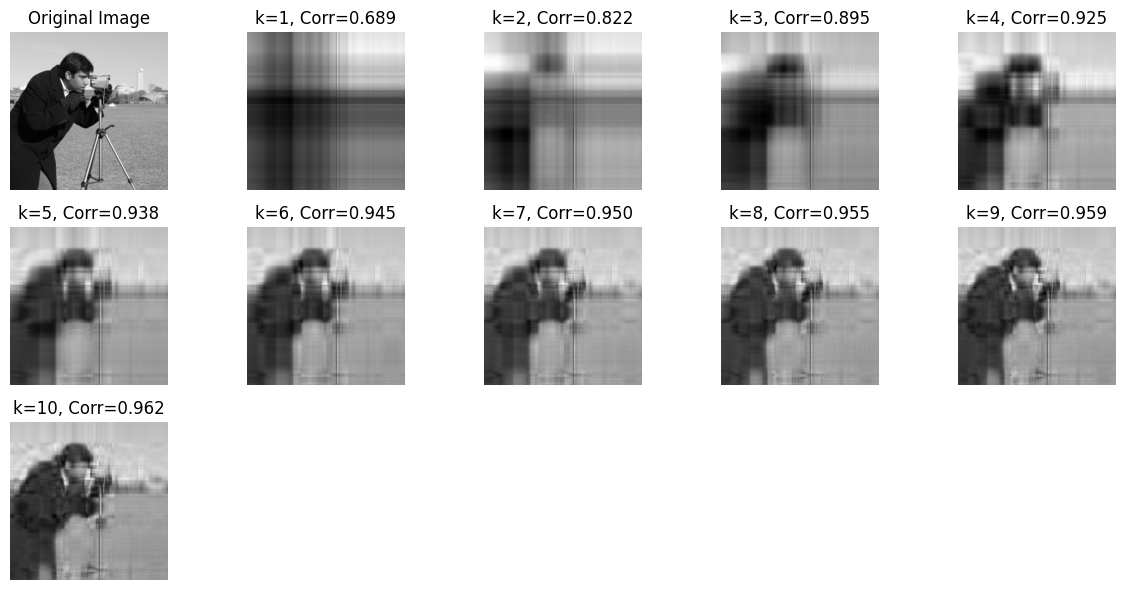

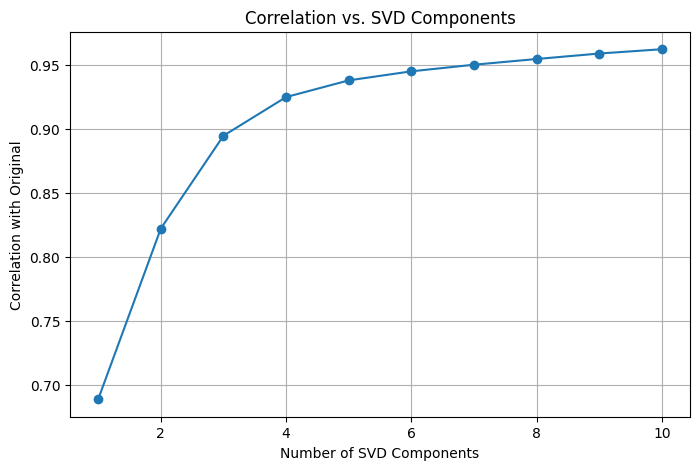

In [ ]:
# Load the Cameraman image (grayscale)
image = camera()
original_shape = image.shape

# Perform Singular Value Decomposition (SVD)
U, S, Vt = svd(image, full_matrices=False)

# Plot original image
plt.figure(figsize=(12, 6))
plt.subplot(3, 5, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")
components = list(range(1, 11))

correlations = []

# Reconstruct images with different numbers of singular values
for i, k in enumerate(components):
    # Reconstruct using first k singular values
    S_k = np.zeros((U.shape[0], Vt.shape[0]))
    S_k[:k, :k] = np.diag(S[:k])
    reconstructed_image = U @ S_k @ Vt

    # Compute correlation with original image
    correlation = np.corrcoef(image.flatten(), reconstructed_image.flatten())[0, 1]
    correlations.append(correlation)

    # Plot reconstructed image
    plt.subplot(3, 5, i + 2)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"k={k}, Corr={correlation:.3f}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# Plot correlation vs. number of SVD components
plt.figure(figsize=(8, 5))
plt.plot(components, correlations, marker='o', linestyle='-')
plt.xlabel("Number of SVD Components")
plt.ylabel("Correlation with Original")
plt.title("Correlation vs. SVD Components")
plt.grid(True)
plt.show()

Q6) Load Cocktail Party Problem dataset from kaggle to perform ICA on separating the
audios of different speakers. Test PCA and compare its performance with ICA’s in
source separation problem.
https://www.kaggle.com/datasets/anashamoutni/cocktail-party-problem-cities-of-the-us

In [74]:
import librosa
import librosa.display
import soundfile as sf
from sklearn.decomposition import FastICA, PCA
import os

In [77]:
from google.colab import files
uploaded = files.upload()

Saving Audio mix.mp3 to Audio mix.mp3


In [78]:
# Step 1: Load the mixed audio file
mixed_audio_file = "Audio mix.mp3"
signal, sr = librosa.load(mixed_audio_file, sr=None)

In [79]:
# Step 2: Convert to mono if stereo
if len(signal.shape) > 1:
    signal = librosa.to_mono(signal)

In [80]:
# Step 3: Reshape signal for ICA (Convert 1D signal to 2D array with multiple time-delayed signals)
X = np.array([signal[i: i + 2048] for i in range(0, len(signal) - 2048, 2048)]).T

In [81]:
# Step 4: Apply ICA to extract independent sources
n_sources = 4  # Setting number of speakers
ica = FastICA(n_components=n_sources)
S_ica = ica.fit_transform(X)  # Independent components

In [82]:
# Step 5: Apply PCA for comparison
pca = PCA(n_components=n_sources)
S_pca = pca.fit_transform(X)  # Principal components

In [83]:
# Step 6: Save and visualize ICA results
for i, source in enumerate(S_ica.T):
    output_file = f"separated_ICA_{i+1}.wav"
    sf.write(output_file, source, sr)
    print(f"ICA Separated Source {i+1} saved as {output_file}")

ICA Separated Source 1 saved as separated_ICA_1.wav
ICA Separated Source 2 saved as separated_ICA_2.wav
ICA Separated Source 3 saved as separated_ICA_3.wav
ICA Separated Source 4 saved as separated_ICA_4.wav


In [84]:
# Step 7: Save and visualize PCA results
for i, source in enumerate(S_pca.T):
    output_file = f"separated_PCA_{i+1}.wav"
    sf.write(output_file, source, sr)
    print(f"PCA Separated Source {i+1} saved as {output_file}")

PCA Separated Source 1 saved as separated_PCA_1.wav
PCA Separated Source 2 saved as separated_PCA_2.wav
PCA Separated Source 3 saved as separated_PCA_3.wav
PCA Separated Source 4 saved as separated_PCA_4.wav


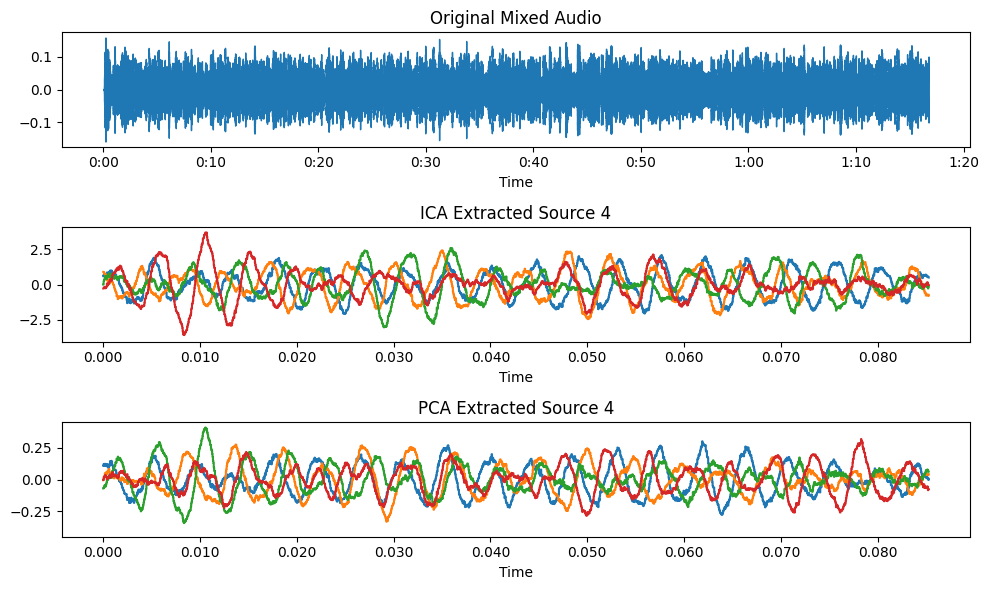

In [85]:
# Step 8: Plot and compare the waveforms
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
librosa.display.waveshow(signal, sr=sr)
plt.title("Original Mixed Audio")

for i in range(n_sources):
    plt.subplot(3, 1, 2)
    librosa.display.waveshow(S_ica[:, i], sr=sr)
    plt.title(f"ICA Extracted Source {i+1}")

    plt.subplot(3, 1, 3)
    librosa.display.waveshow(S_pca[:, i], sr=sr)
    plt.title(f"PCA Extracted Source {i+1}")

plt.tight_layout()
plt.show()